RFM (Recency Frequency Monetary) Analysis
RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries

RFM stands for the three dimensions:

1)Recency – How recently did the customer purchase?
2)Frequency – How often do they purchase?
3)Monetary Value – How much do they spend?

Before starting RFM analysis we need to set objective and outcome of analysis, for this example goal is to define class of customer example - Platinum, Gold and Silver.

1)Platinum customer - frequent and more revenue generator.
2)Gold customer - frequent but less revenue generator.
3)silver customer - less frequent and less revenue generator.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load data into pandas dataframe..
df = pd.read_csv('/content/data.csv', encoding="ISO-8859-1")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Country with high count must be taken for testing purpose.  divide based on demographic or similar taste

df.Country.value_counts().head(5)

df = df[df.Country == 'United Kingdom']

In [ ]:
cat_var = [i for i in df.columns if df[i].dtype == "O"]

In [ ]:
cat_var

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']

In [ ]:
for i in cat_var:
    print("Column:- ",i)
    print(df[i].value_counts())
    print("")

Column:-  InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
553396        1
571900        1
C553397       1
553398        1
C558733       1
Name: InvoiceNo, Length: 23494, dtype: int64

Column:-  StockCode
85123A    2215
85099B    2001
22423     1862
47566     1634
20725     1460
          ... 
72800F       1
72781        1
35015        1
72793        1
90102        1
Name: StockCode, Length: 4065, dtype: int64

Column:-  Description
WHITE HANGING HEART T-LIGHT HOLDER     2271
JUMBO BAG RED RETROSPOT                2001
REGENCY CAKESTAND 3 TIER               1859
PARTY BUNTING                          1634
LUNCH BAG RED RETROSPOT                1460
                                       ... 
MIA                                       1
PINK CRYSTAL GUITAR PHONE CHARM           1
showroom                                  1
TRAVEL CARD WALLET DOTCOMGIFTSHOP         1
ORANGE PENDANT TRIPLE SHELL NECKLAC       1
Name: Description, Len

In [ ]:
df['Country'].value_counts()

United Kingdom    495478
Name: Country, dtype: int64

<Axes: >

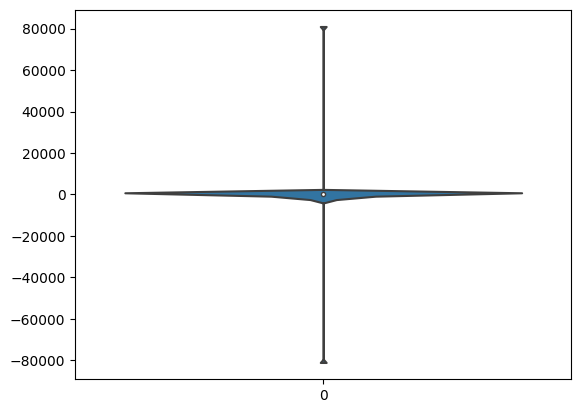

In [ ]:
#checking distribution of quantity

sns.violinplot(df.Quantity)

In [ ]:
df.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
#Quantity can not be negative so remove negative values
df = df[df['Quantity']>0]

In [ ]:
df.Quantity.describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

<Axes: >

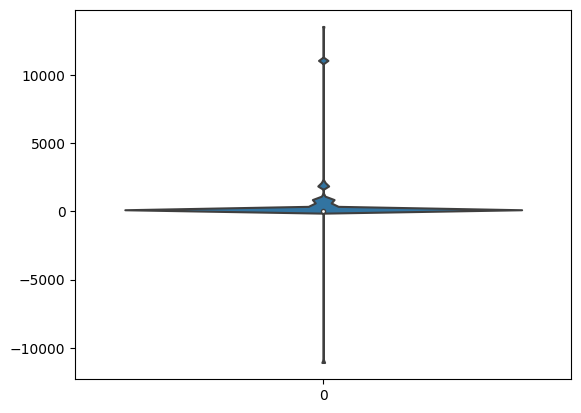

In [ ]:
#checking distribution of unit price
sns.violinplot(df.UnitPrice)

In [ ]:
df.UnitPrice.describe()

count    486286.000000
mean          3.794976
std          41.271159
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [ ]:
df = df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [ ]:
num_var = []
for i in df.columns:
  if df[i].dtype != 'O':
    num_var.append(i)
num_var

['Quantity', 'UnitPrice', 'CustomerID']

Column :-  Quantity


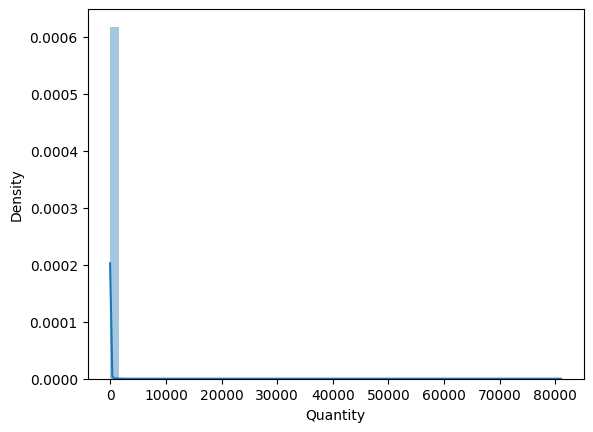


Column :-  UnitPrice


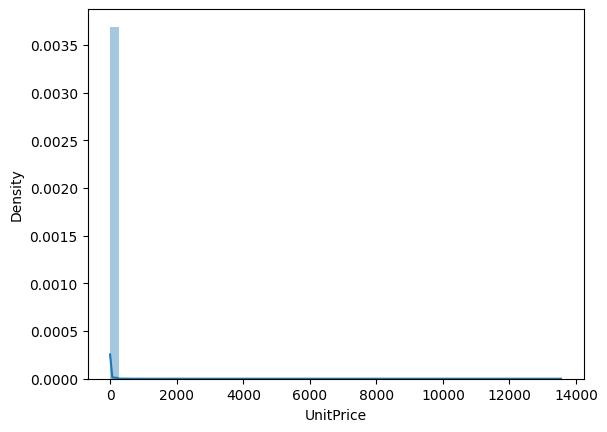


Column :-  CustomerID


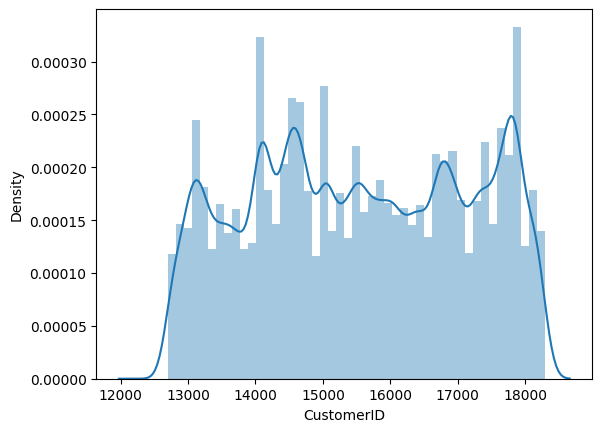

In [ ]:
for k in num_var:
  print('Column :- ',k)
  sns.distplot(df[k])
  plt.show()
  print('')

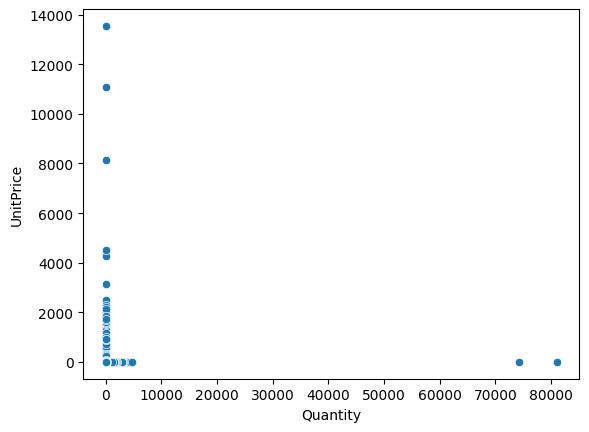

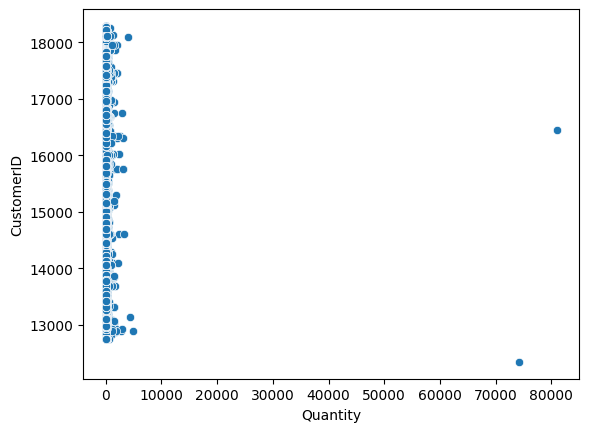

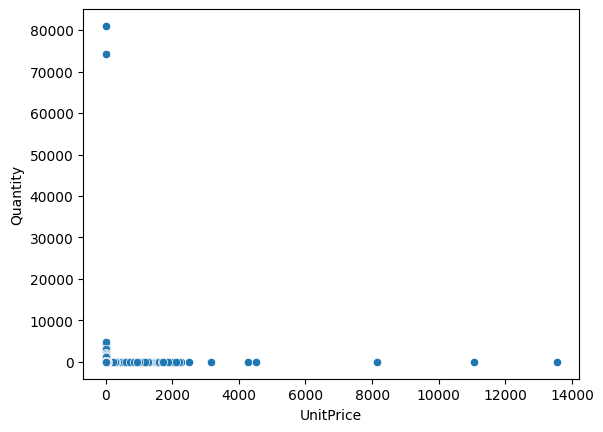

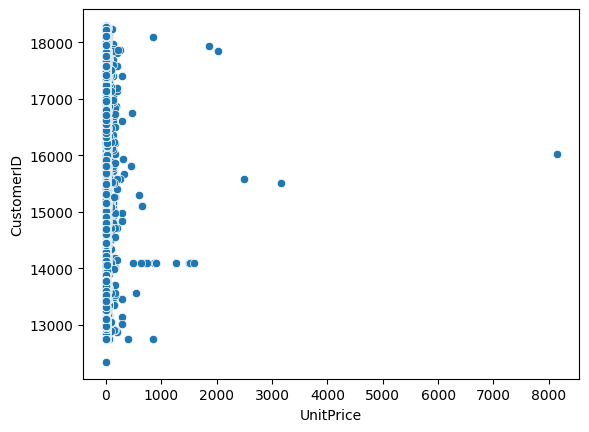

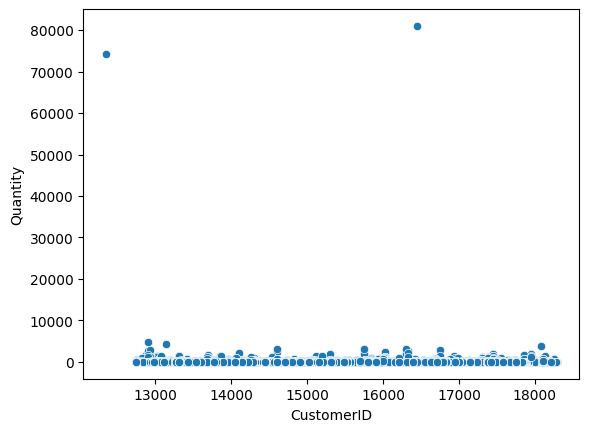

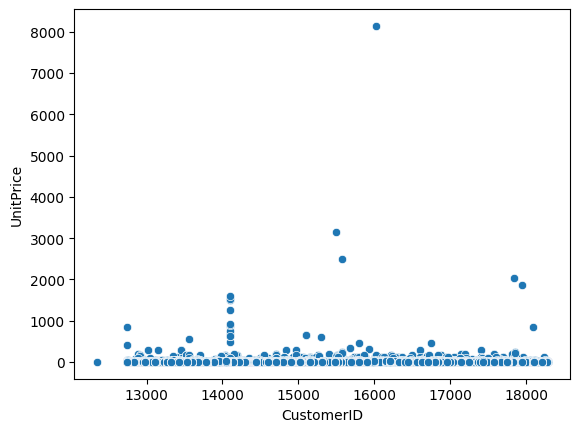

In [ ]:
for l in num_var:
  for m in num_var:
    if l != m:
      sns.scatterplot(x=l,y=m,data = df)
      plt.show()
      print('')

In [ ]:
#checking null values in all columns in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130802
Country             0
dtype: int64

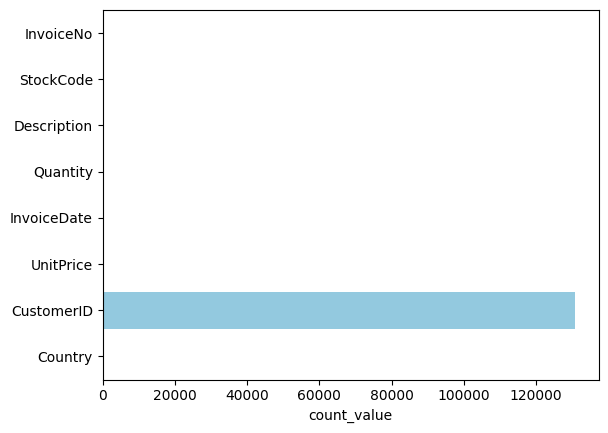

In [ ]:
null_values = pd.DataFrame(df.isnull().sum(),columns=['count_value'])
ax = sns.barplot(x='count_value', y=null_values.index, data=null_values,color='skyblue')


In [ ]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#last date available in our dataset
df['InvoiceDate'].max()

'9/9/2011 9:52'

In [ ]:
#useing latest date in our data as current date

import datetime as dt
now = dt.date(2011,12,9)

In [ ]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [ ]:
#group by customer by last date they purchased

recency_df = df.groupby(['CustomerID'],as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [ ]:
#calculate how often he is purchasing with reference to latest date in days

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

In [ ]:
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3
5,12821.0,2011-05-09,214
6,12822.0,2011-09-30,70
7,12823.0,2011-09-26,74
8,12824.0,2011-10-11,59
9,12826.0,2011-12-07,2


In [ ]:
recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [ ]:
#check frequency of customer means how many transaction has been done

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True)
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head(10)


,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4
5,12821.0,1
6,12822.0,2
7,12823.0,5
8,12824.0,1
9,12826.0,7


In [ ]:
#calculate how much a customer spend in the each transaction

df['Total_cost'] = df['UnitPrice'] * df['Quantity']

In [ ]:
#check summed up spend of a customer with respect to latest date

monetary_df=df.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']

In [ ]:
monetary_df.head(10)

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
5,12821.0,92.72
6,12822.0,948.88
7,12823.0,1759.50
8,12824.0,397.12
9,12826.0,1474.72


In [ ]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together

#combine first recency and frequency..
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')

#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)

In [ ]:
rfm.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,209,33719.73
12749.0,3,5,4090.88
12820.0,3,4,942.34
12821.0,214,1,92.72
12822.0,70,2,948.88
12823.0,74,5,1759.50
12824.0,59,1,397.12


In [ ]:
#checking correctness of output

df[df.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,77183.6


In [ ]:
(now - dt.date(2011,1,18)).days == 325

True

In [ ]:
#bring all the quartile value in a single dataframe

rfm_segmentation = rfm.copy()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that.

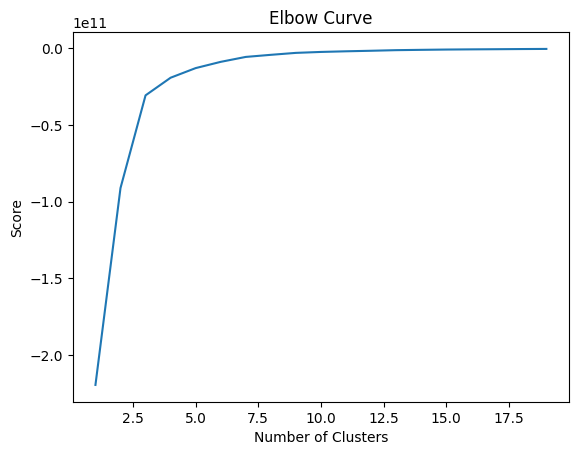

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [ ]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [ ]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12747.0,2,11,4196.01,0
12749.0,3,5,4090.88,0
12820.0,3,4,942.34,0
12821.0,214,1,92.72,0
12822.0,70,2,948.88,0
12823.0,74,5,1759.50,0
12824.0,59,1,397.12,0
12826.0,2,7,1474.72,0
12827.0,5,3,430.15,0


<Axes: xlabel='cluster', ylabel='Recency'>

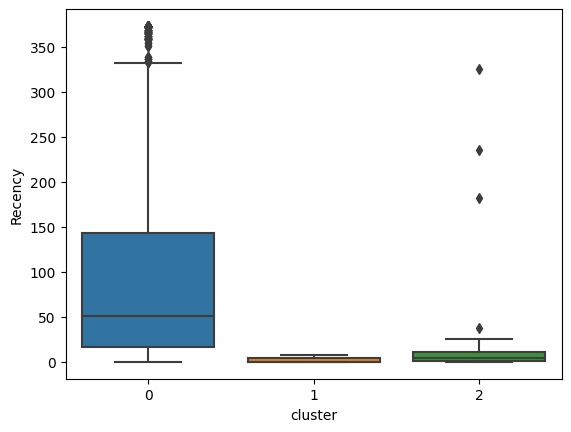

In [ ]:
sns.boxplot(x=rfm_segmentation['cluster'], y=rfm_segmentation['Recency'])   # Recency

''' cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum and gold customer. '''

<Axes: xlabel='cluster', ylabel='Frequency'>

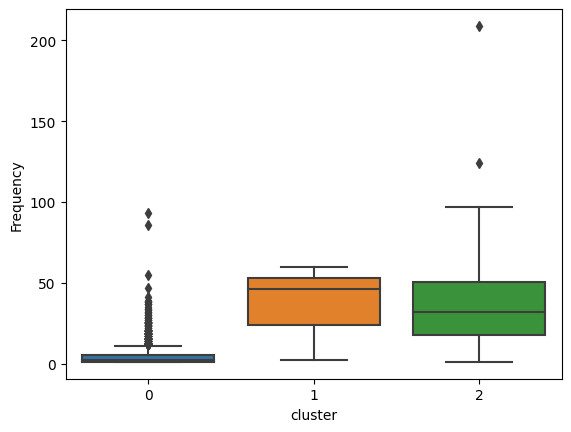

In [ ]:
sns.boxplot(x=rfm_segmentation['cluster'], y=rfm_segmentation['Frequency']) #Frequency

'''
cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in
race of platinum and gold customer.
'''

<Axes: xlabel='cluster', ylabel='Monetary'>

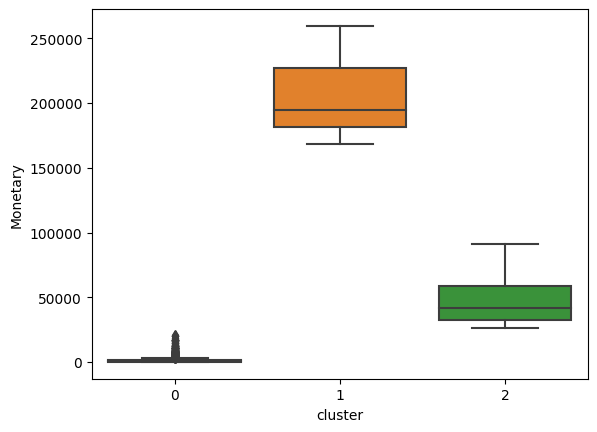

In [ ]:
sns.boxplot(x=rfm_segmentation['cluster'],y=rfm_segmentation['Monetary']) # Monetary

'''
cluster 0 have low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as
cluster 2 have medium level(Gold) and cluster 0 is silver customer.
'''

**Based on customer Segmentation we found out cluster 1 is Platinum customers Cluster 2 is Gold Customers Cluster 3 is Silver Customers**

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25%
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75%
values.
''' bold text

In [ ]:
quantile = rfm.quantile(q=[0.25,0.5,0.75])
quantile

,Recency,Frequency,Monetary
0.25,17.0,1.0,300.280
0.50,50.0,2.0,652.280
0.75,142.0,5.0,1576.585


In [ ]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [ ]:
quantile.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.28000000000003, 0.5: 652.28, 0.75: 1576.585}}

In [ ]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441
12747.0,2,11,4196.01,0,1,1,1,111
12748.0,0,209,33719.73,2,1,1,1,111
12749.0,3,5,4090.88,0,1,2,1,121
12820.0,3,4,942.34,0,1,2,2,122


'''
Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score
between 3 and 12. Here the advantage is that each of the scores got same importance."



In [ ]:
rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + \
rfm_segmentation['M_Quartile']

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441,9
12747.0,2,11,4196.01,0,1,1,1,111,3
12748.0,0,209,33719.73,2,1,1,1,111,3
12749.0,3,5,4090.88,0,1,2,1,121,4
12820.0,3,4,942.34,0,1,2,2,122,5


In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  423
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  31
Lost Customers:  187
Lost Cheap Customers:  396


In [ ]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
CustomerID,,,,,,,,,
18102.0,0,60,259657.30,1,1,1,1,111,3
17450.0,8,46,194550.79,1,1,1,1,111,3
17511.0,2,31,91062.38,2,1,1,1,111,3
16684.0,4,28,66653.56,2,1,1,1,111,3
14096.0,4,17,65164.79,2,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
17102.0,261,1,25.50,0,4,4,4,444,12
15823.0,372,1,15.00,0,4,4,4,444,12
17763.0,263,1,15.00,0,4,4,4,444,12


In [ ]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

RFMScore
111     8443.319409
112     1241.785577
113      443.086667
114      201.120000
121     2482.559268
           ...     
434      208.722982
441    14665.555000
442      942.920313
443      402.421137
444      158.611742
Name: Monetary, Length: 61, dtype: float64

<Axes: xlabel='Total_score'>

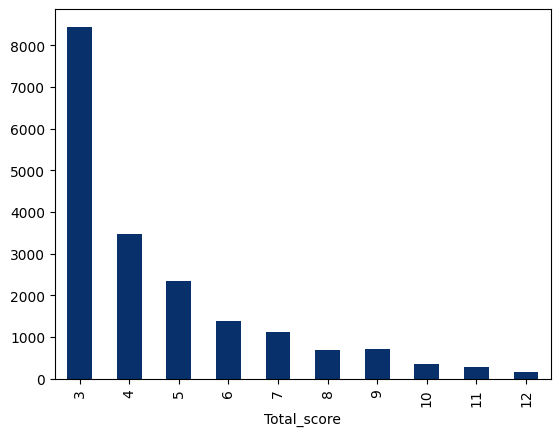

In [ ]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

Based on Monetary we see Total_score 3,4,5 have highest value which is good for model. because it could have combination of values such as 111, 121, 122 etc.

<Axes: xlabel='Total_score'>

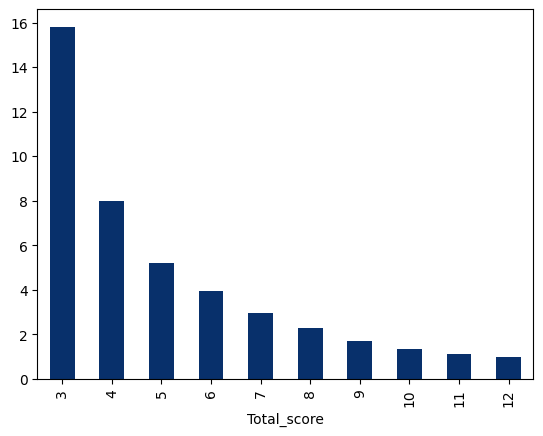

In [ ]:
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')

Based on Frequncy we see Total_score 3,4,5 have highest value which is good for model. because it could have combination of values such as 111, 121, 122 etc

<Axes: xlabel='Total_score'>

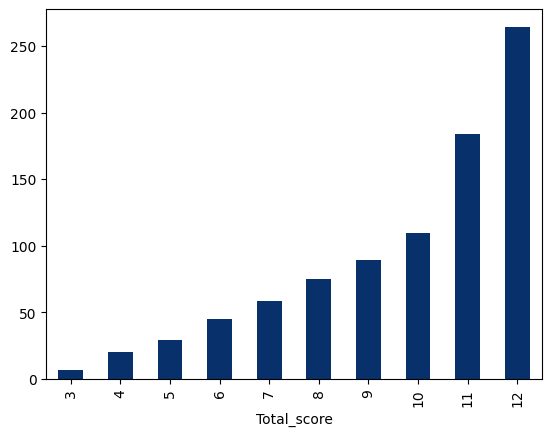

In [ ]:
rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')

Based on Recency we see Total_score 10,11,12 have highest value . because it could have combination of values such as 444, 434, 334 etc